# Introduction - the CRISP-DM Model

<div>
<img src="https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png" width="500"/>
</div>

CRISP-DM, or Cross Industry Standard Process for Data Mining, is a widely used model for managing data mining and machine learning projects. It consists of six phases that guide the project from start to finish. In this explanation, we will explore each phase in detail.

## 1. Business Understanding

The first phase involves understanding the project's objectives, requirements, and resources. This step is crucial as it helps define the scope of the project, determine the feasibility of the project, and identify the stakeholders involved. The goal is to create a clear understanding of the business problem that needs to be solved and define the key performance indicators (KPIs) that will be used to measure the success of the project.

## 2. Data Understanding

The second phase involves gathering and exploring the data required to solve the business problem. This step aims to understand the quality and characteristics of the data and identify any potential issues that could affect the analysis. The data must be collected, cleaned, and prepared for modeling in this phase.

## 3. Data Preparation

The third phase involves preparing the data for analysis. This step involves data cleaning, data transformation, and feature engineering. The goal is to create a clean and structured dataset that can be used for modeling.

## 4. Modeling

The fourth phase involves building the model. This step involves selecting the appropriate algorithm, training the model, and validating the results. The goal is to create a predictive model that can solve the business problem.

## 5. Evaluation

The fifth phase involves evaluating the model's performance. This step involves measuring the model's accuracy, precision, recall, and other metrics. The goal is to determine whether the model is suitable for the business problem and whether it meets the KPIs defined in the first phase.

## 6. Deployment

The sixth and final phase involves deploying the model into the business environment. This step involves integrating the model into the existing systems, testing it, and monitoring its performance. The goal is to ensure that the model is working as expected and delivering the desired results.

In conclusion, the CRISP-DM model is a structured approach to managing data mining and machine learning projects. It provides a clear roadmap for project managers, data scientists, and other stakeholders to follow, ensuring that the project is delivered on time and within budget while meeting the business requirements.

# Setup

In [1]:
!pip install numpy pandas scikit-learn seaborn matplotlib geopandas
!git clone https://github.com/joncutrer/geopandas-tutorial.git
!git clone https://github.com/Seb1703/AI-Dojo/tree/main/Basics/sample_data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import sklearn

fatal: destination path 'geopandas-tutorial' already exists and is not an empty directory.
fatal: destination path 'sample_data' already exists and is not an empty directory.


# 1. Business Understanding - The Use Case

In the real estate industry, it is crucial to accurately predict the value of a house based on its properties to make informed decisions when buying or selling properties. To achieve this, we will be using the California housing dataset to build a predictive model that can accurately estimate the value of a house based on its characteristics.

# 2. Data Understanding - The Data Set

To develop our predictive model, we have access to data from our customer in the form of a CSV file. This data will provide us with valuable insights into the characteristics and values of their properties, allowing us to build a  model for predicting house prices.

### The Basics

#### Pandas Dataframes
In this notebook, we utilize a number of functions and data types from the Pandas library, including DataFrames, the round() function, the describe() function, and the read_csv() function. These tools allow us to efficiently manage and manipulate our data, performing important tasks such as rounding numerical values, providing summary statistics, and reading CSV files into our notebook.

- Offical api documentation --> https://pandas.pydata.org/docs/reference/  
- For more pandas information or functions see -> https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [2]:
# Example Dataframe:
df_example = pd.DataFrame([[4.234, 7.2345, 10.12], [5.45653, 8.123, 11.22], [6.1, 9.3453, 12.1234]], index=[1, 2, 3], columns=['a', 'b', 'c'])

print("Standard Dataframe:")
df_example

Standard Dataframe:


,a,b,c
1,4.23400,7.2345,10.1200
2,5.45653,8.1230,11.2200
3,6.10000,9.3453,12.1234


In [3]:
# The function describe() shows for numeric data frames the number, the mean, the standard deviation, the minimum, the maximum as well as the lower, 50th and upper percentile.
print("Dataframe used with .describe() Function:")
df_example.describe()

Dataframe used with .describe() Function:


,a,b,c
count,3.000000,3.000000,3.000000
mean,5.263510,8.234267,11.154467
std,0.947856,1.059790,1.003306
min,4.234000,7.234500,10.120000
25%,4.845265,7.678750,10.670000
50%,5.456530,8.123000,11.220000
75%,5.778265,8.734150,11.671700
max,6.100000,9.345300,12.123400


In [4]:
# The round() function rounds the values of a data frame to a specific decimal digit, which can be passed as a parameter.
print("Dataframe rounded to 2 decimals with the .round() Function:")
df_example.round(2)

Dataframe rounded to 2 decimals with the .round() Function:


,a,b,c
1,4.23,7.23,10.12
2,5.46,8.12,11.22
3,6.10,9.35,12.12


In [5]:
# The copy() function copies the data and indicies of an existing dataframe and creates a copy of it as a new dataframe
df_copy = df_example.copy(deep=False) #deep=False -> current version is copied; =true -> original version is copied

print("Are both data frames equal? " + "\n" + str(df_copy == df_example))

# "==" and "is" | df_reference = df_example

Are both data frames equal? 
      a     b     c
1  True  True  True
2  True  True  True
3  True  True  True


In [6]:
# The apply() function applies a specific operation on either a specific index or column
print("The example data frame, summed in each index:")
df_example.apply(np.sum, axis=0) #axis = 0 --> index | axis = 1 --> column

The example data frame, summed in each index:


a    15.79053
b    24.70280
c    33.46340
dtype: float64

#### Seaborn
Seaborn is a Python data visualization library that builds upon Matplotlib to provide a high-level interface for creating visually appealing and informative statistical graphics. For example, we can use Seaborn to generate a scatter plot of the relationship between two variables.

<Axes: xlabel='a', ylabel='b'>

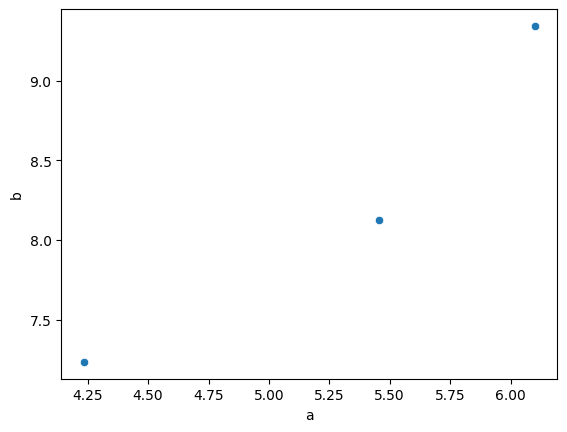

In [7]:
# Use Seaborn to create a scatter plot
sns.scatterplot(x='a', y='b', data=df_example)

### The Use Case

#### Loading the data

The CSV-File is read and loaded via the Pandas Function ".read.csv()" and converted into the data type "DataFrame" offered by Pandas:<br> Data Frames are multi-dimensional tables on which you can perform functions and queries via indexes.

In [8]:
#df_train = pd.read_csv("./sample_data/california_housing_train.csv")
df_train = pd.read_csv("./sample_data/housing.csv")

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### A first look at the data

In [9]:
# TODO
# Use the describe function to get an overview of the customer data.
df_train.describe().round(2)

#TODOSEB
#Warning that not all columns of this descriptive table are useful (e.g. long/lat)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


Seaborn is a powerful Python data visualization library that is built upon the foundations of Matplotlib. By providing a high-level interface for creating visually appealing and informative statistical graphics, Seaborn enables us to quickly and easily generate a wide range of graphs and charts to better understand our data. Additionally, Seaborn simplifies the process of setting various Matplotlib parameters, streamlining the visualization process and resulting in clean and visually appealing outputs.

<Axes: xlabel='households', ylabel='total_bedrooms'>

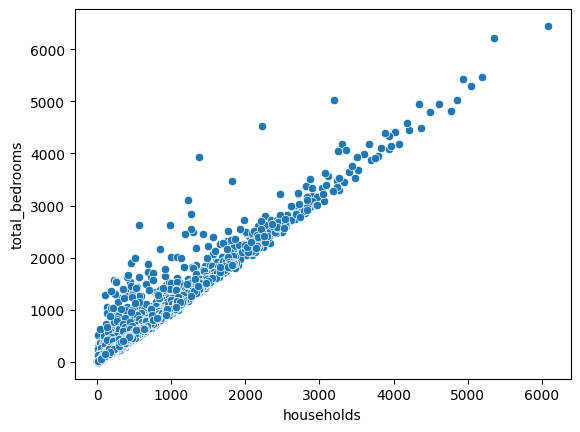

In [10]:
#TODOSEB
#Variation of different types of visualisazion
sns.scatterplot(data=df_train, x="households", y="total_bedrooms")

- For more information on seaborn at its functions see --> http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247

<Axes: xlabel='population', ylabel='median_house_value'>

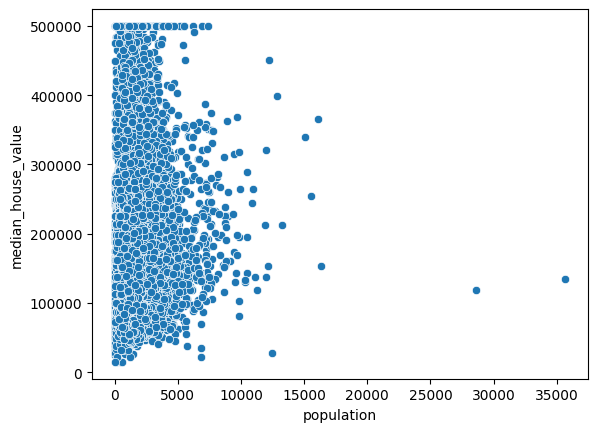

In [11]:
sns.scatterplot(data=df_train, x="population", y="median_house_value")

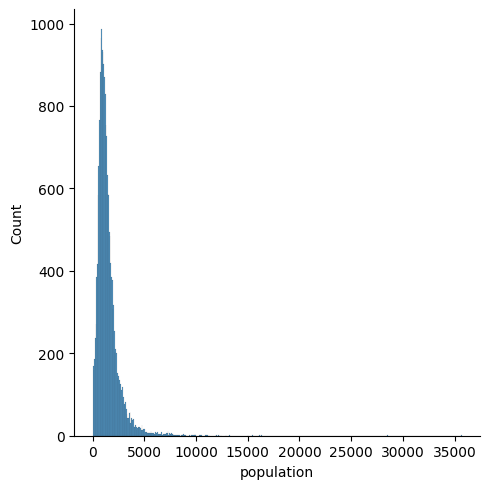

In [12]:
sns.displot(data=df_train, x="population")

<Axes: xlabel='longitude', ylabel='housing_median_age'>

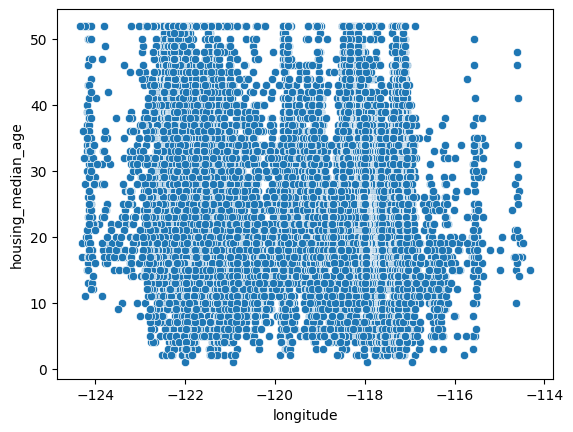

In [13]:
sns.scatterplot(data=df_train, x="longitude", y="housing_median_age")

<Axes: xlabel='latitude', ylabel='housing_median_age'>

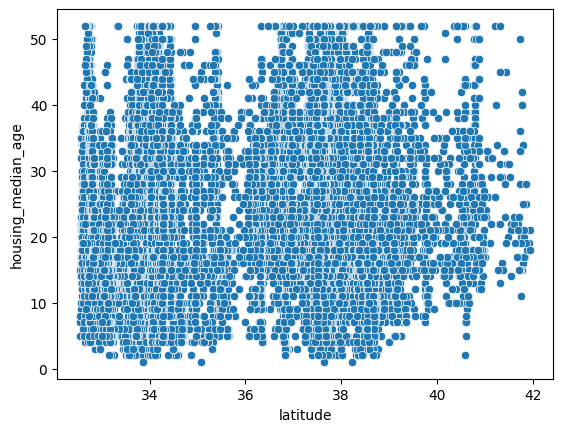

In [14]:
sns.scatterplot(data=df_train, x="latitude", y="housing_median_age")

<Axes: >

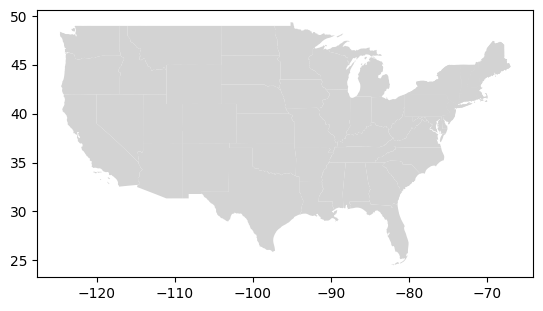

In [15]:
states = gpd.read_file('./geopandas-tutorial/data/usa-states-census-2014.shp')
states.plot(color="lightgrey")

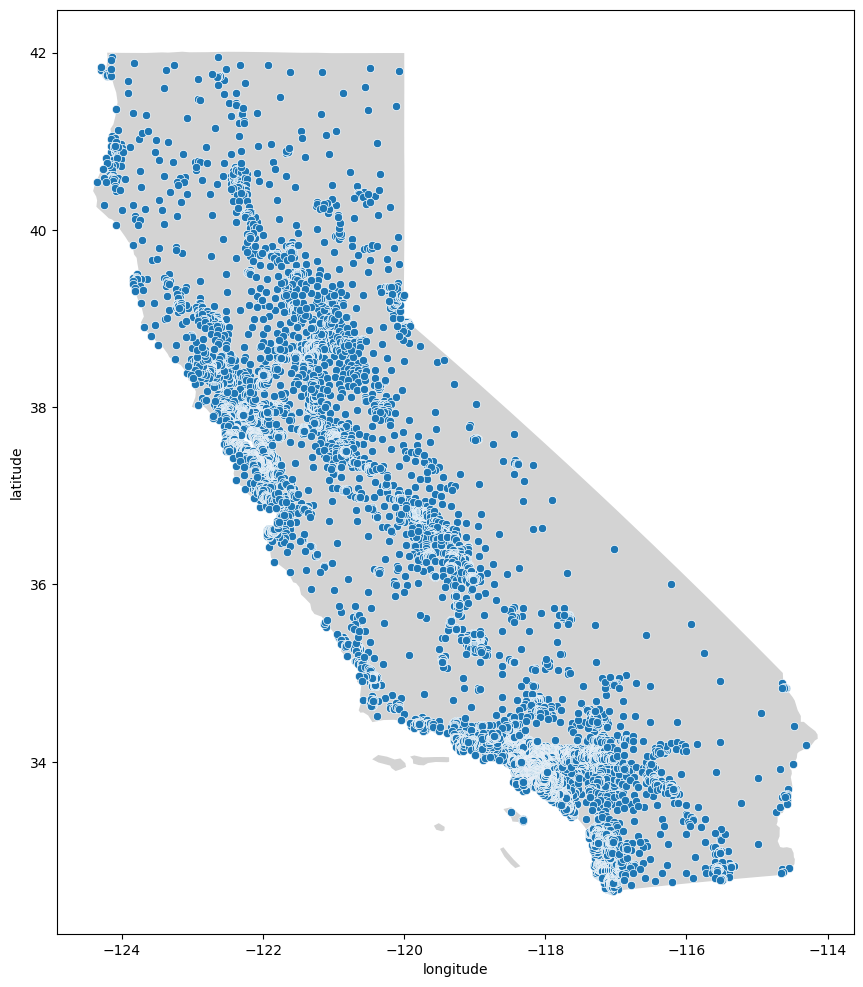

In [16]:
# initialize an axis
fig, ax = plt.subplots(figsize=(16,12))

# plot map on axis
states[states["NAME"] == "California"].plot(color="lightgrey", ax=ax)

# plot points
sns.scatterplot(data=df_train, x="longitude", y="latitude", ax=ax)

plt.show()

# 3. Data Preperation



### The Basics

In [17]:
# TODO Examples with Code
# One example of imputing missing values
# One example of removing outliers

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# One example of imputing missing values
#total bedrooms imputing with factor between average total of rooms and average total of bedrooms
factor = df_train["total_rooms"].mean()/df_train["total_bedrooms"].mean()
df_train["total_bedrooms"].fillna(df_train["total_rooms"]*factor, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### The Use Case

In [19]:
# Mögliche Fragen: Warum genau die Werte für die Klassen? Mögliche Antworten: Eventuell %-Quantile nehmen

def get_value(x):
  if x < 121200.00:
    return "low"
  if x > 263975.00:
    return "high"
  return "medium"

df_train_classes = df_train.copy()

df_train_classes["house_value"] = df_train_classes.median_house_value.apply(get_value)
df_train_classes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,high
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,high
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,high
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,low


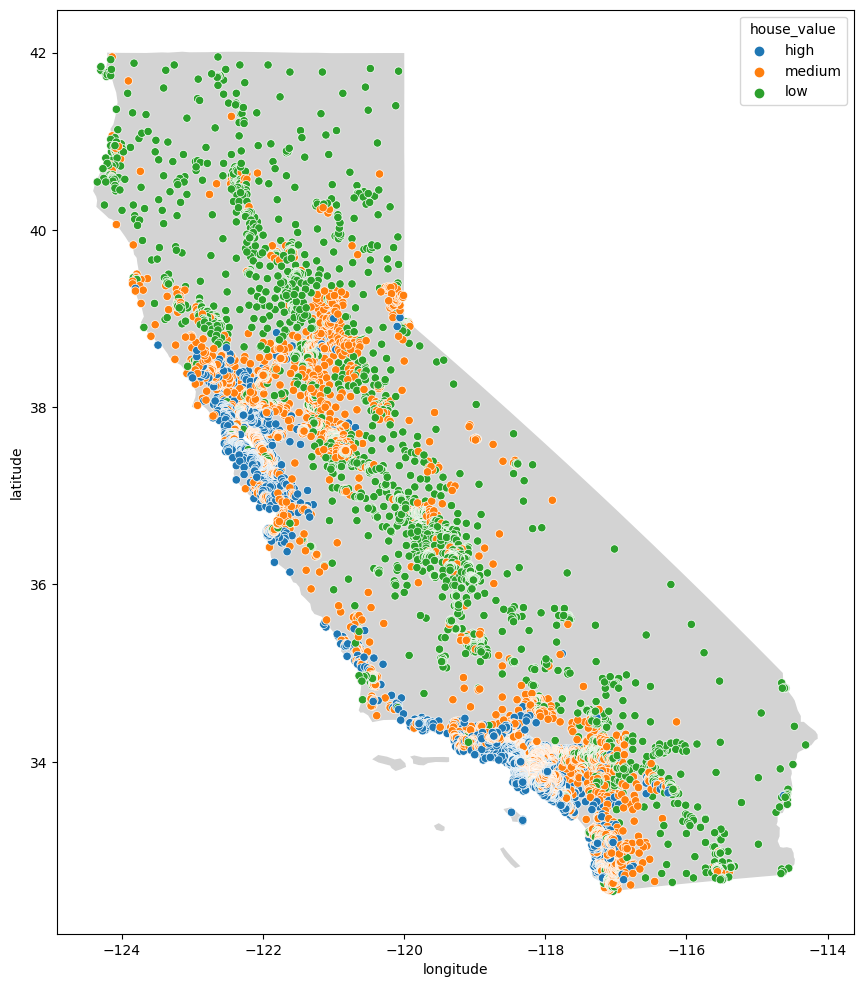

In [20]:
# initialize an axis
fig, ax = plt.subplots(figsize=(16,12))

# plot map on axis
states[states["NAME"] == "California"].plot(color="lightgrey", ax=ax)

# plot points
sns.scatterplot(data=df_train_classes, x="longitude", y="latitude", hue="house_value", hue_order=["high","medium","low"], ax=ax)

plt.show()

# 4. Modeling

### The Basics

#### KNN

KNN (K - Nearest Neighbors) is one of many (supervised learning) algorithms used in data mining and machine learning. It is a classification algorithm where learning is based on "how similar" the data (a vector) is to others.
The KNN’s steps are:
1. Obtain unclassified data
2. measure the distance (Euclidean, Manhattan, Minkowski or weighted) between the new data and all other already classified data
3. determine the K (K is a parameter you define) smaller distances
4. Checks the list of classes with the shortest distance and counts the number of each class that appears
5. takes the class that appears most often as the correct class
6. classifies the new data with the class you chose in step 5

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/KNN.png" width="500"/>

---
</div>

#### Decision Trees:

A decision tree is a type of supervised machine learning used to categorize or make predictions based on the answers to a prior set of questions. The decision tree may not always provide a unique answer or decision. Instead, it can present options so that the data scientist can make an informed decision on his or her own. Decision trees mimic human reasoning, so it is generally easy for data scientists to understand and interpret the results.

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Decision_tree.png" width="500"/>
</div>

#### Linear Regression

A regression model provides a function that describes the relationship between one or more independent variables and a response or outcome variable. For example, the relationship between height and weight can be described by a linear regression model. Regression analysis is the basis for many types of predictions and for determining effects on target variables.

Linear regression means finding the line of best fit for data. It quantifies the linear relationship between the predictor variable and the variable being predicted.

# <div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Linear_regression.png" width="500"/>
</div>

#### Polynomial Regression

Polynomial regression allows you to change the cost function of a regression model to a specific degree function. For example, linear regression is a linear function of degree 1, but for more partitioned data, a linear cost function is often not accurate enough. Therefore, polynomial regression can be used to change the cost function to a quadratic function of degree 2, for example. Here it is very important to consider what kind of data one is processing and test several different degrees to find the best possible cost function to avoid over-fitting or under-fitting.

Example of Polynomial Regression on a given data set with the function degrees 1, 3 and 20:

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Polynomial_Regression.png" width="1000"/>
</div>

#### Logistic Regression

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

Sigmoid Function as the cost function for Logistic Regression:
$$
f(x)=\frac{1}{1+e^{(-x)}}
$$

<div>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Linear_vs_Logistic.png" width="800"/>
<img src="https://raw.githubusercontent.com/Seb1703/AI-Dojo/main/Basics/extra_data/Sigmoid.png" width="300"/>
</div>

### The Use Case

#### Train Test Split and Visulaization

In [21]:
from sklearn.model_selection import train_test_split

features = ["longitude", "latitude"]
#features = ["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"]
label = ["house_value"]

X_train, X_test, y_train, y_test = train_test_split(df_train_classes[features], df_train_classes[label], test_size=0.30, random_state=42)

In [22]:
def plot_eval_map(df_in, prediction, actual):
  df = df_in.copy()

  # initialize an axis
  fig, ax = plt.subplots(figsize=(16,12))
  # plot map on axis
  states[states["NAME"] == "California"].plot(color="lightgrey", ax=ax)

  df["house_value_predicted"] = prediction
  df["house_value"] = actual
  df["correct_predicted"] = df["house_value_predicted"] == actual

  # plot points
  sns.scatterplot(data=df.loc[~df["correct_predicted"],:], x="longitude", y="latitude", hue="house_value", hue_order=["high","medium","low"], ax=ax)

  plt.show()

#### Classification - KNearesNeighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train["house_value"])
knn_model.score(X_test, y_test)

0.8063630490956072

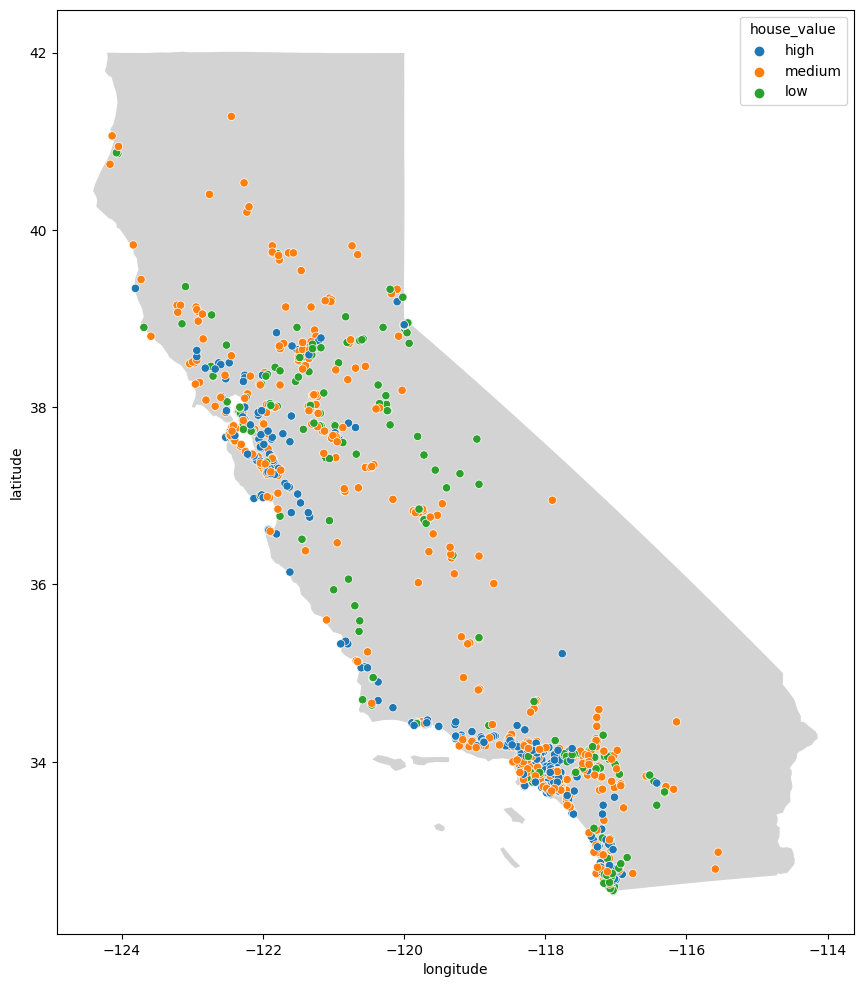

In [24]:
plot_eval_map(X_test, knn_model.predict(X_test), y_test["house_value"])

#### Classification - DecisionTree

In [25]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(max_depth=15)

dtc_model.fit(X_train, y_train)
dtc_model.score(X_test, y_test)

0.789405684754522

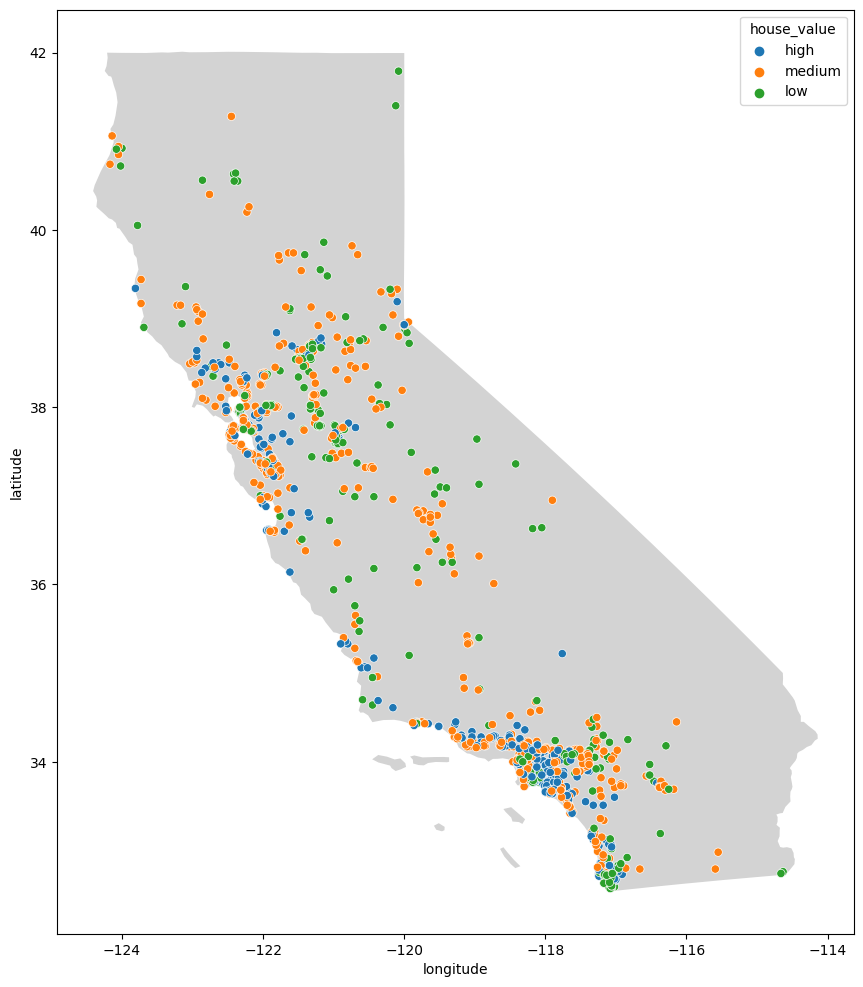

In [26]:
plot_eval_map(X_test, dtc_model.predict(X_test), y_test["house_value"])

In [27]:
# TODO explain sklearn and functions needed

Sklearn is an important library for data analytics because it focuses on machine learning tools, including mathematical, statistical, and general algorithms that form the basis for many machine learning technologies. Some of the large key elements of Sklearn that are useful for machine learning include classification, regression, and clustering algorithms.

Sklearn provides support for a wide range of classification algorithms and machine learning models, all classification algorithms used here are supported and importable through Sklearn!

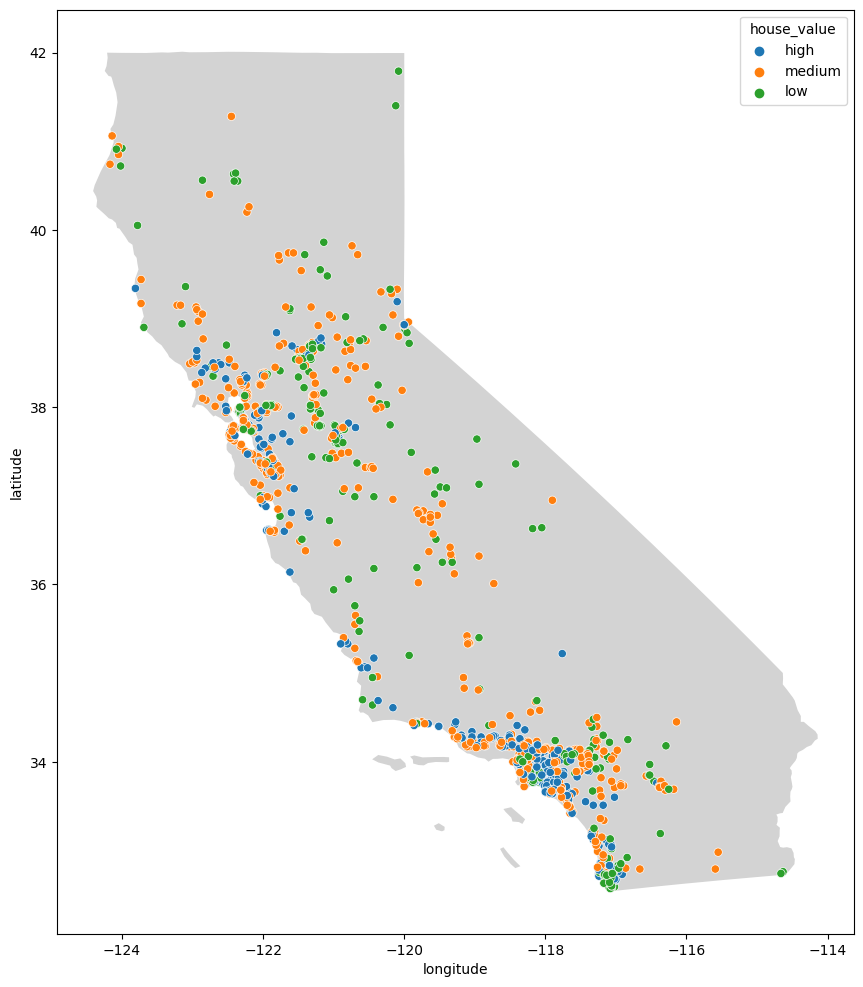

In [28]:
plot_eval_map(X_test, dtc_model.predict(X_test), y_test["house_value"])

#### Regression - Lineare Regression

In [29]:
# features = ["longitude", "latitude"]
features = ["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"]
label = ["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[label], test_size=0.30, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()

linreg_model.fit(X_train, y_train)
linreg_model.score(X_test, y_test)

0.6265331410517485

#### Regression - Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()

polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

model.fit(X_train_poly, y_train)

X_test_poly = polynomial_features.fit_transform(X_test)

model.score(X_test_poly, y_test)

0.686179958287527

In [32]:
input = polynomial_features.fit_transform([X_train.iloc[20].values])

model.predict(input)

array([[57038.56001076]])

In [33]:
X_train.iloc[666]

longitude            -119.6000
latitude               36.5600
housing_median_age     36.0000
total_rooms           738.0000
total_bedrooms        168.0000
population            737.0000
households            186.0000
median_income           1.4415
Name: 2444, dtype: float64

In [34]:
y_train.iloc[20]

median_house_value    66600.0
Name: 13498, dtype: float64

In [35]:
# TODO Build RandomForestRegression

#### Regression - Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=19)

model.fit(X_train, y_train.values.ravel())

model.score(X_test, y_test)

0.8089989896185655

# 5. Evaluation

In [37]:
# TODO build pipeline for best models

Extra ToDo:
- ROC Curve?
- Model vergleichen?

# 6. Deployment

In [38]:
import requests
import urllib.parse

def get_lat_long_by_address(address):
  url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
  response = requests.get(url).json()

  return {"longitude": response[0]["lon"], "latitude": response[0]["lat"]}

In [39]:
class_model = knn_model

def get_house_value_class(address):

  input = pd.DataFrame([get_lat_long_by_address(address)])
  output = class_model.predict(input)
  return output[0]


In [40]:
regr_model = linreg_model

def get_house_value_estimate(address, additional_info):

  input = additional_info
  input["longitude"] = get_lat_long_by_address(address)["longitude"]
  input["latitude"] = get_lat_long_by_address(address)["latitude"]
  input = pd.DataFrame([input]).loc[:,["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income"]]
  output = regr_model.predict(input)
  return output[0][0]

In [41]:
additional_info = {"housing_median_age": 20,	"total_rooms": 5000,	"total_bedrooms": 2000,	"population": 2000,	"households": 500,	"median_income": 5}

In [42]:
address = 'Belmont Heights, Long Beach, California'
# address = 'East Los Angeles, California, USA'
# address = 'San Pedro, Los Angeles, California'
#address = '4304 W Dakota Ave, Fresno, CA 93722'

In [43]:
get_house_value_class(address)

JSONDecodeError: ignored

In [ ]:
get_house_value_estimate(address, additional_info)